# Lab 3: decisions trees for classification and regression

In this notebook, we fit, optimize and plot decision trees to the spam (classification) and the housing (regression) datasets.

In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

## Decision trees for classification

We begin by fetching the dataset.

In [2]:
from sklearn.datasets import fetch_openml
spam = fetch_openml(name='spambase', parser='auto')

X, y = spam.data, spam.target

X.shape, y.shape

((4601, 57), (4601,))

We split the data into train and test sets.

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

We import and instantiate the decision tree model for classification

In [4]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)

TODO: fit the instantiated model.

In [5]:
# TODO
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)

TODO: Evaluate the performance of the fitted model on the test.

In [6]:
# TODO
from sklearn.metrics import accuracy_score
y_predict = clf.predict(X_test)

In [7]:
accuracy_score(y_test,y_predict)

0.836350470673425

Note that we could directly use the function `cross_val_score` to get an estimate of the performance of the instantiated model as follows.

In [8]:
from sklearn.model_selection import cross_val_score
print(np.mean(cross_val_score(clf, X, y, cv=5)))

0.8235162630411178


### Tree representation

We now want to have a visual representation of the fitted tree in order to interpret it more easily.

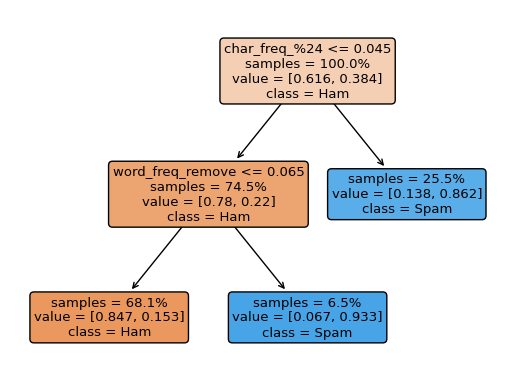

In [9]:
tree.plot_tree(clf, feature_names=spam.feature_names, class_names=['Ham', 'Spam'], 
               filled=True, impurity=False, proportion=True, rounded=True)
plt.show()

The first split is done according to the value of the frequency of the character '%24'. What does the character '%24' actually represent?
In the dataset, the character '%24' and all other characters are actually encoded as [hex](https://en.wikipedia.org/wiki/Hexadecimal). We will decode them in the following cell in order to get a more interpretable tree.

In [10]:
feature_names = []
for feature_name in spam.feature_names:
    if feature_name[:4]=='char':
        char = feature_name[-2:]
        decoded_name = 'char_freq_{}'.format(bytearray.fromhex(char).decode())
        feature_names.append(decoded_name)
    else:
        feature_names.append(feature_name)

In [11]:
feature_names

['word_freq_make',
 'word_freq_address',
 'word_freq_all',
 'word_freq_3d',
 'word_freq_our',
 'word_freq_over',
 'word_freq_remove',
 'word_freq_internet',
 'word_freq_order',
 'word_freq_mail',
 'word_freq_receive',
 'word_freq_will',
 'word_freq_people',
 'word_freq_report',
 'word_freq_addresses',
 'word_freq_free',
 'word_freq_business',
 'word_freq_email',
 'word_freq_you',
 'word_freq_credit',
 'word_freq_your',
 'word_freq_font',
 'word_freq_000',
 'word_freq_money',
 'word_freq_hp',
 'word_freq_hpl',
 'word_freq_george',
 'word_freq_650',
 'word_freq_lab',
 'word_freq_labs',
 'word_freq_telnet',
 'word_freq_857',
 'word_freq_data',
 'word_freq_415',
 'word_freq_85',
 'word_freq_technology',
 'word_freq_1999',
 'word_freq_parts',
 'word_freq_pm',
 'word_freq_direct',
 'word_freq_cs',
 'word_freq_meeting',
 'word_freq_original',
 'word_freq_project',
 'word_freq_re',
 'word_freq_edu',
 'word_freq_table',
 'word_freq_conference',
 'char_freq_;',
 'char_freq_(',
 'char_freq_[',
 '

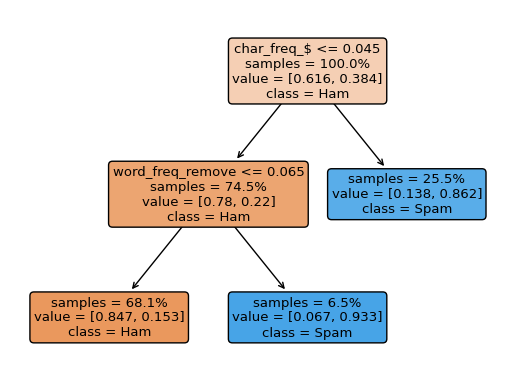

In [12]:
tree.plot_tree(clf, feature_names=feature_names, class_names=['Ham', 'Spam'], 
               filled=True, impurity=False, proportion=True, rounded=True)
plt.show()

We see that '%24' is actually the dollar sign. If it appears too often in an email, the fitted tree will flag it as a spam email.

### Optimizing the decision tree model.

**Exercise**: using the GridSearchCV approach, find the best value for the parameter `max_leaf_nodes`. 
Plot and interpret the obtained tree.
Compare the obtained results with those we obtained in the previous lab. 


**Extra**: 

- add the ROC curve associated to the optimized model to the curves we plotted in the previous lab.

- we have only optimized one parameter `max_leaf_nodes` of the decision tree model. Look at the documentation and check if you can get a better performance by optimizing other sets of parameters

In [13]:
from sklearn.metrics import roc_curve ,roc_auc_score
from sklearn.linear_model import LogisticRegression

In [14]:
reg = LogisticRegression()
reg.fit(X_train,y_train)

c:\Users\gabriel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [15]:
y_score = clf.predict_proba(X_test)[:,1]
y_score1 = reg.predict_proba(X_test)[:,1]
false_positive,true_positive,treshold = roc_curve(y_test.astype(int),y_score)
false_positive1,true_positive1,treshold1 = roc_curve(y_test.astype(int),y_score1)


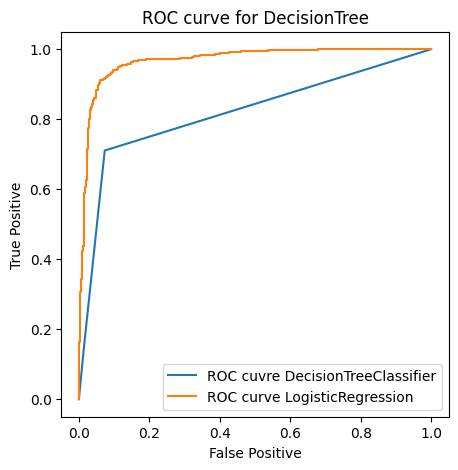

In [16]:
plt.subplots(1,figsize =(5,5))
plt.title('ROC curve for DecisionTree')
plt.plot(false_positive,true_positive,label = 'ROC cuvre DecisionTreeClassifier')
plt.plot(false_positive1,true_positive1, label = 'ROC curve LogisticRegression')
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.legend()
plt.show()

## Decision trees for regression

**Exercise**: *fit* and *optimize* a decision tree model on the California housing dataset.

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor

BT = make_pipeline(preprocessing.StandardScaler(), DecisionTreeRegressor())


In [18]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing(as_frame=True)
housing_df = housing.frame
X,y = np.asarray(housing.data),np.asarray(housing.target)

In [19]:
X_train1,X_test1,y_train1,y_test1 = train_test_split(X,y,train_size=0.6,random_state=0)

In [20]:
parameters = {'decisiontreeregressor__max_leaf_nodes': range(40,150)}
BP = GridSearchCV(BT,parameters,verbose = 1)
BP.fit(X_train1,y_train1)

Fitting 5 folds for each of 110 candidates, totalling 550 fits


GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('decisiontreeregressor',
                                        DecisionTreeRegressor())]),
             param_grid={'decisiontreeregressor__max_leaf_nodes': range(40, 150)},
             verbose=1)

In [21]:
N = BP.best_params_
print(N)

{'decisiontreeregressor__max_leaf_nodes': 135}


In [22]:
clf2 = DecisionTreeRegressor(max_leaf_nodes=147,random_state=0)

In [23]:
clf2.fit(X_train1,y_train1)
y_predict1 = clf2.predict(X_test1)

In [24]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test1,y_predict1)

0.392704464510455

In [25]:
clf2.score(X_test1,y_test1)

0.7055144828599569

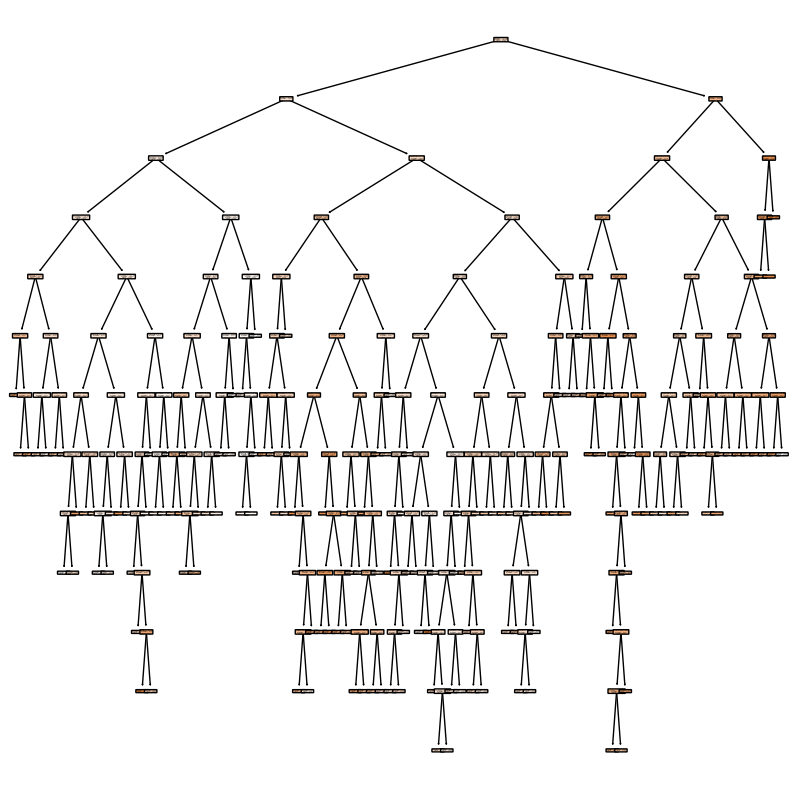

In [26]:
plt.subplots(1,figsize = (10,10))
tree.plot_tree(clf2, feature_names=housing.feature_names, 
               filled=True, impurity=False, proportion=True, rounded=True)
plt.show()